This version of the example uses lmfit (https://lmfit.github.io/lmfit-py/) with an explicitly defined objective function

In [1]:
import numpy as np
from lmfit import minimize, Parameters
import matplotlib.pyplot as plt

In [2]:
# Generate example data according to an exponential PDF
np.random.seed(42)
lambda_=3.14159   # lambda is a keyword, so use lambda_ instead!
x_true = np.random.exponential(scale=lambda_, size=1000)

# Create histogram of the data
range=(0.0,4.0)
counts, bin_edges = np.histogram(x_true, bins=50, range=range, density=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
errs = np.sqrt(counts)

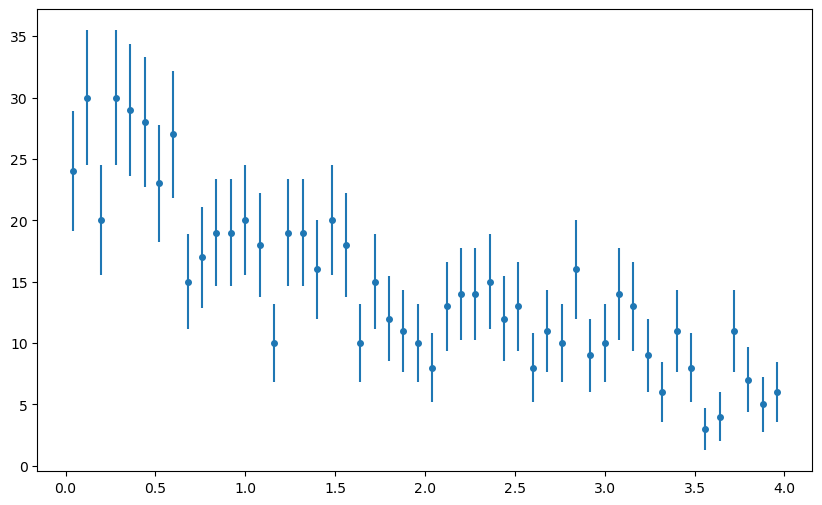

In [3]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4); # ; removes text above plot

In [4]:
# Define the model function
def expo(x, scale, lambda_):
    return scale * np.exp(-x/lambda_)

# Define the objective function to minimize (chi-square)
# returns the 'residual array'
def objective(params, x, data, errs):
    scale = params['scale']
    lambda_ = params['lambda_']
    
    model = expo(x, scale, lambda_)
    return (model - data) / errs # chi
    # perhaps it should be the following line:
    # return ( (model - data) / errs ) ** 2 # chi-square


# Set up parameters with initial guesses
params = Parameters()
params.add('scale', value=np.max(counts))
params.add('lambda_', value=2)

Check our guess for the starting parameter values

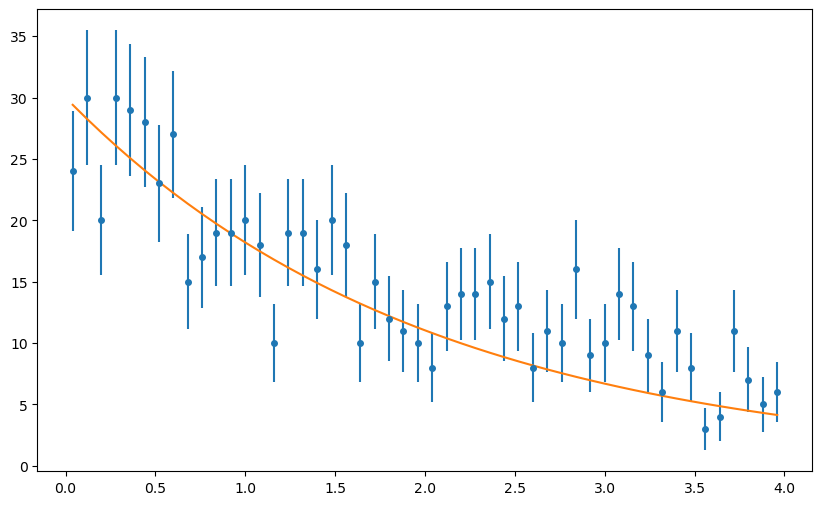

In [5]:
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=errs, fmt='o', label='Data', markersize=4)
plt.plot(bin_centers,expo(bin_centers,params['scale'].value,params['lambda_'].value)); # ; removes text above plot

The initial guess for the paraemter values looks pretty good.  Therfore the minimzer should be able to converge to a good minimum.

In [6]:
# Perform the fit
result = minimize(objective, params, args=(bin_centers, counts, errs))

# does this automatically do chi-square?

In [7]:
result.chisqr # maybe this just takes the objective and squares it?

np.float64(44.59948301834432)


Fit Results:
scale: 26.769 ± 1.684
lambda_: 2.608 ± 0.230

chi-square: 44.6
reduced chi-square: 0.93
degrees of freedom: 48


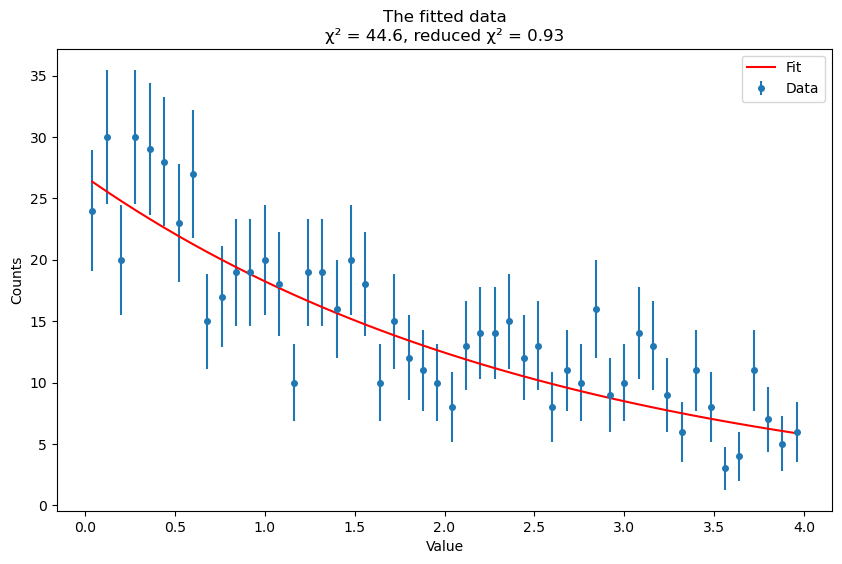

In [8]:
# Calculate the best fit curve
best_fit = expo(bin_centers, result.params['scale'].value, result.params['lambda_'].value)

# get the chi-square and reduced chi-square
chisq = result.chisqr
red_chisq = result.redchi
nDOF = result.nfree

# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, counts, yerr=np.sqrt(counts), 
             fmt='o', label='Data', markersize=4)
plt.plot(bin_centers, best_fit, 'r-', label='Fit')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend()
plt.title('The fitted data\n' + 
          f'χ² = {chisq:.1f}, reduced χ² = {red_chisq:.2f}')

# Print fit results
print('\nFit Results:')
for name, param in result.params.items():
    print(f'{name}: {param.value:.3f} ± {param.stderr:.3f}')
print(f'\nchi-square: {chisq:.1f}')
print(f'reduced chi-square: {red_chisq:.2f}')
print(f'degrees of freedom: {nDOF}')

plt.show()

In [9]:
# using the internal fit report
from lmfit import fit_report
print(fit_report(result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 50
    # variables        = 2
    chi-square         = 44.5994830
    reduced chi-square = 0.92915590
    Akaike info crit   = -1.71503690
    Bayesian info crit = 2.10900911
[[Variables]]
    scale:    26.7688637 +/- 1.68408629 (6.29%) (init = 30)
    lambda_:  2.60812945 +/- 0.23002917 (8.82%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(scale, lambda_) = -0.8105
